In [1]:
from protocol import *

# **Supplementary Note 1: Simple Graph**

### **Naive Labelling**

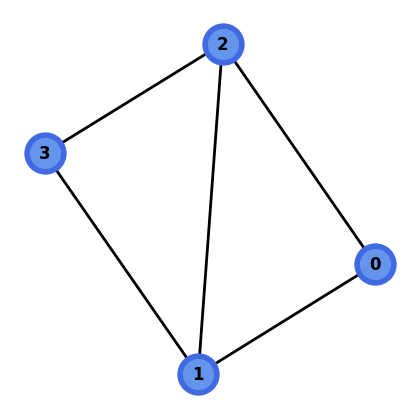

|000000>/4 + |000001>/4 + |000010>/4 - |000011>/4 + |000100>/4 - |000101>/4 - |000110>/4 - |000111>/4 + |001000>/4 + |001001>/4 - |001010>/4 + |001011>/4 - |001100>/4 + |001101>/4 - |001110>/4 - |001111>/4

In [2]:
edges = [[0, 1], [0, 2], [1, 2], [1, 3], [2, 3]]

graph = Graph(edges)
graph.draw()
stabilizer = Stabilizer(graph=graph)
n_emitters = num_emitters(stabilizer)

expected_state = tensor(Qubit('0'*n_emitters), graph.state())
display(expected_state)

In [3]:
protocol = photonic_circuit_solver(stabilizer)

circ = protocol_to_circuit(protocol)
print(circ)

generated_state = protocol_to_state(protocol)
display(generated_state)
print("Match:", generated_state == expected_state)

                     ░ ┌───┐           ░                 ░              »
q_0: ────────────────░─┤ X ├───────────░─────────────────░──────────────»
                     ░ └─┬─┘           ░ ┌───┐           ░              »
q_1: ────────────────░───┼─────────────░─┤ X ├───────────░──────────────»
                     ░   │             ░ └─┬─┘           ░ ┌───┐┌───┐   »
q_2: ────────────────░───┼─────────────░───┼─────────────░─┤ X ├┤ H ├───»
                     ░   │             ░   │             ░ └─┬─┘└───┘   »
q_3: ────────────────░───┼─────────────░───┼─────────────░───┼──────────»
          ┌───┐┌───┐ ░   │  ┌───┐┌───┐ ░   │  ┌───┐      ░   │          »
q_4: ─────┤ X ├┤ H ├─░───■──┤ X ├┤ H ├─░───■──┤ X ├──────░───┼──────────»
     ┌───┐└─┬─┘└───┘ ░      └─┬─┘└───┘ ░      └─┬─┘┌───┐ ░   │  ┌───┐┌─┐»
q_5: ┤ H ├──■────────░────────■────────░────────■──┤ H ├─░───■──┤ H ├┤M├»
     └───┘           ░                 ░           └───┘ ░      └───┘└╥┘»
c: 1/═════════════════════════════════

|000000>/4 + |000001>/4 + |000010>/4 - |000011>/4 + |000100>/4 - |000101>/4 - |000110>/4 - |000111>/4 + |001000>/4 + |001001>/4 - |001010>/4 + |001011>/4 - |001100>/4 + |001101>/4 - |001110>/4 - |001111>/4

Match: True


### **Minimal Emitter Labelling**

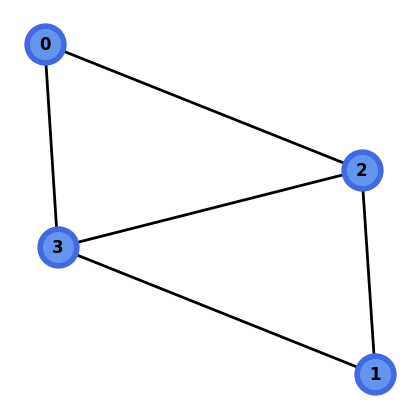

|00000>/4 + |00001>/4 + |00010>/4 + |00011>/4 + |00100>/4 - |00101>/4 - |00110>/4 + |00111>/4 + |01000>/4 - |01001>/4 - |01010>/4 + |01011>/4 - |01100>/4 - |01101>/4 - |01110>/4 - |01111>/4

In [4]:
graph, n_emitters = photon_permuter(graph)

graph.draw()
stabilizer = Stabilizer(graph=graph)

expected_state = tensor(Qubit('0'*n_emitters), graph.state())
display(expected_state)

In [6]:
protocol = photonic_circuit_solver(stabilizer)

circ = protocol_to_circuit(protocol)
print(circ)

generated_state = protocol_to_state(protocol)
display(generated_state)
print("Match:", generated_state == expected_state)

           ░ ┌───┐                ░                      ░                     »
q_0: ──────░─┤ X ├────────────────░──────────────────────░─────────────────────»
           ░ └─┬─┘                ░ ┌───┐┌───┐           ░                     »
q_1: ──────░───┼──────────────────░─┤ X ├┤ H ├───────────░─────────────────────»
           ░   │                  ░ └─┬─┘└───┘           ░ ┌───┐┌───┐┌───┐     »
q_2: ──────░───┼──────────────────░───┼──────────────────░─┤ X ├┤ H ├┤ S ├─────»
           ░   │                  ░   │                  ░ └─┬─┘└───┘└───┘     »
q_3: ──────░───┼──────────────────░───┼──────────────────░───┼─────────────────»
     ┌───┐ ░   │  ┌───┐┌───┐┌───┐ ░   │  ┌───┐┌───┐┌───┐ ░   │  ┌───┐┌───┐┌───┐»
q_4: ┤ H ├─░───■──┤ X ├┤ H ├┤ S ├─░───■──┤ X ├┤ H ├┤ S ├─░───■──┤ X ├┤ H ├┤ S ├»
     └───┘ ░      └───┘└───┘└───┘ ░      └───┘└───┘└───┘ ░      └───┘└───┘└───┘»
c: 1/══════════════════════════════════════════════════════════════════════════»
                            

|00000>/4 + |00001>/4 + |00010>/4 + |00011>/4 + |00100>/4 - |00101>/4 - |00110>/4 + |00111>/4 + |01000>/4 - |01001>/4 - |01010>/4 + |01011>/4 - |01100>/4 - |01101>/4 - |01110>/4 - |01111>/4

Match: True


# **Supplementary Note 2: Shor Code**

In [7]:
stabilizers = ['ZZIIIIIII',
               'IZZIIIIII',
               'XXXXXXIII',
               'IIIZZIIII',
               'IIIIZZIII',
               'IIIXXXXXX',
               'IIIIIIZZI',
               'IIIIIIIZZ']

logical_X = 'ZZZZZZZZZ'
logical_Z = 'XXXXXXXXX'
stabilizers.append(logical_Z)

stabilizer = Stabilizer(stabs=stabilizers)
n_emitters = num_emitters(stabilizer)

expected_state = tensor(Qubit('0'*n_emitters),
                        protocol_to_state(stabilizer.protocol(), progress=True))
display(expected_state)

sqrt(2)*|0000000000>/4 + sqrt(2)*|0000000111>/4 + sqrt(2)*|0000111000>/4 + sqrt(2)*|0000111111>/4 + sqrt(2)*|0111000000>/4 + sqrt(2)*|0111000111>/4 + sqrt(2)*|0111111000>/4 + sqrt(2)*|0111111111>/4

In [8]:
protocol = photonic_circuit_solver(stabilizer)

circ = protocol_to_circuit(protocol)
print(circ)

generated_state = protocol_to_state(protocol)
display(generated_state)
print("Match:", generated_state == expected_state)

           ░ ┌───┐┌───┐ ░            ░                                        »
q_0: ──────░─┤ X ├┤ H ├─░────────────░────────────────────────────────────────»
           ░ └─┬─┘└───┘ ░ ┌───┐      ░                                        »
q_1: ──────░───┼────────░─┤ X ├──────░────────────────────────────────────────»
           ░   │        ░ └─┬─┘      ░ ┌───┐┌───┐     ┌──────  ┌───┐ ───────┐ »
q_2: ──────░───┼────────░───┼────────░─┤ X ├┤ H ├─────┤       ─┤ X ├        ├─»
           ░   │        ░   │        ░ └─┬─┘└───┘     │        └───┘        │ »
q_3: ──────░───┼────────░───┼────────░───┼────────────┤       ──────        ├─»
           ░   │        ░   │        ░   │            │                     │ »
q_4: ──────░───┼────────░───┼────────░───┼────────────┤       ──────        ├─»
           ░   │        ░   │        ░   │            │                     │ »
q_5: ──────░───┼────────░───┼────────░───┼────────────┤       ──────        ├─»
           ░   │        ░   │        ░  

sqrt(2)*|0000000000>/4 + sqrt(2)*|0000000111>/4 + sqrt(2)*|0000111000>/4 + sqrt(2)*|0000111111>/4 + sqrt(2)*|0111000000>/4 + sqrt(2)*|0111000111>/4 + sqrt(2)*|0111111000>/4 + sqrt(2)*|0111111111>/4

Match: True


# **Supplementary Note 3**

### **Naive Labelling**

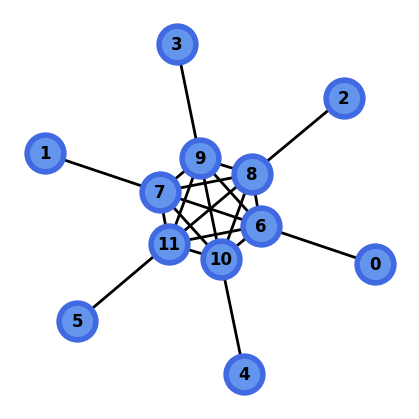

In [9]:
edges = [[0, 6], [1, 7], [2, 8], [3, 9], [4, 10], [5, 11],
         [6, 7], [6, 8], [6, 9], [6, 10], [6, 11],
         [7, 8], [7, 9], [7, 10], [7, 11],
         [8, 9], [8, 10], [8, 11],
         [9, 10], [9, 11],
         [10, 11]]

graph = Graph(edges)
graph.draw()
stabilizer = Stabilizer(graph=graph)

In [10]:
protocol = photonic_circuit_solver(stabilizer)

circ = protocol_to_circuit(protocol)
print(circ)

            ░ ┌───┐      ░                 ░                      ░           »
 q_0: ──────░─┤ X ├──────░─────────────────░──────────────────────░───────────»
            ░ └─┬─┘      ░ ┌───┐           ░                      ░           »
 q_1: ──────░───┼────────░─┤ X ├───────────░──────────────────────░───────────»
            ░   │        ░ └─┬─┘           ░ ┌───┐                ░           »
 q_2: ──────░───┼────────░───┼─────────────░─┤ X ├────────────────░───────────»
            ░   │        ░   │             ░ └─┬─┘                ░ ┌───┐     »
 q_3: ──────░───┼────────░───┼─────────────░───┼──────────────────░─┤ X ├─────»
            ░   │        ░   │             ░   │                  ░ └─┬─┘     »
 q_4: ──────░───┼────────░───┼─────────────░───┼──────────────────░───┼───────»
            ░   │        ░   │             ░   │                  ░   │       »
 q_5: ──────░───┼────────░───┼─────────────░───┼──────────────────░───┼───────»
            ░   │        ░   │          

### **Optimized Labelling**

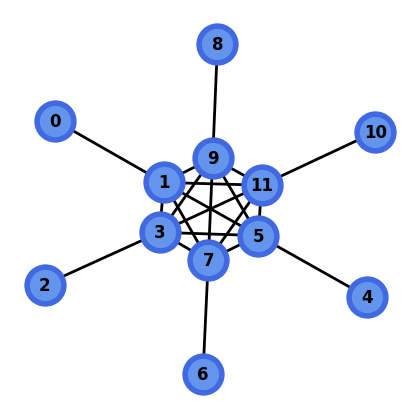

In [11]:
edges = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11],
         [1, 3], [1, 5], [1, 7], [1, 9], [1, 11],
         [3, 5], [3, 7], [3, 9], [3, 11],
         [5, 7], [5, 9], [5, 11],
         [7, 9], [7, 11],
         [9, 11]]

graph = Graph(edges)
graph.draw()
stabilizer = Stabilizer(graph=graph)

In [12]:
protocol = photonic_circuit_solver(stabilizer)

circ = protocol_to_circuit(protocol)
print(circ)

                 ░ ┌───┐                     ░                      ░      »
 q_0: ───────────░─┤ X ├─────────────────────░──────────────────────░──────»
                 ░ └─┬─┘                     ░ ┌───┐                ░      »
 q_1: ───────────░───┼───────────────────────░─┤ X ├────────────────░──────»
                 ░   │                       ░ └─┬─┘                ░ ┌───┐»
 q_2: ───────────░───┼───────────────────────░───┼──────────────────░─┤ X ├»
                 ░   │                       ░   │                  ░ └─┬─┘»
 q_3: ───────────░───┼───────────────────────░───┼──────────────────░───┼──»
                 ░   │                       ░   │                  ░   │  »
 q_4: ───────────░───┼───────────────────────░───┼──────────────────░───┼──»
                 ░   │                       ░   │                  ░   │  »
 q_5: ───────────░───┼───────────────────────░───┼──────────────────░───┼──»
                 ░   │                       ░   │                  ░   │  »

### **Removed Unnecessary Edges**

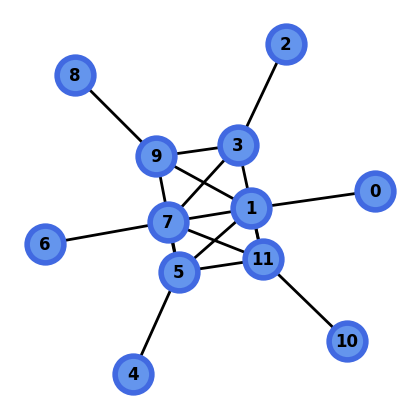

In [30]:
edges = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11],
         [1, 5], [1, 7], [1, 9], [1, 11],
         [3, 7], [3, 9], [3, 11],
         [5, 7], [5, 9], [5, 11],
         [7, 11]]

graph = Graph(edges)
graph.draw()
stabilizer = Stabilizer(graph=graph)

In [31]:
n_emitters = num_emitters(stabilizer)
expected_state = tensor(Qubit('0'*n_emitters), graph.state(progress=True))
display(expected_state)

|00000000000000>/64 + |00000000000001>/64 + |00000000000010>/64 - |00000000000011>/64 + |00000000000100>/64 + |00000000000101>/64 + |00000000000110>/64 - |00000000000111>/64 + |00000000001000>/64 + |00000000001001>/64 + |00000000001010>/64 - |00000000001011>/64 - |00000000001100>/64 - |00000000001101>/64 - |00000000001110>/64 + |00000000001111>/64 + |00000000010000>/64 + |00000000010001>/64 + |00000000010010>/64 - |00000000010011>/64 + |00000000010100>/64 + |00000000010101>/64 + |00000000010110>/64 - |00000000010111>/64 + |00000000011000>/64 + |00000000011001>/64 + |00000000011010>/64 - |00000000011011>/64 - |00000000011100>/64 - |00000000011101>/64 - |00000000011110>/64 + |00000000011111>/64 + |00000000100000>/64 + |00000000100001>/64 - |00000000100010>/64 + |00000000100011>/64 + |00000000100100>/64 + |00000000100101>/64 - |00000000100110>/64 + |00000000100111>/64 + |00000000101000>/64 + |00000000101001>/64 - |00000000101010>/64 + |00000000101011>/64 - |00000000101100>/64 - |000000001

In [32]:
protocol = photonic_circuit_solver(stabilizer)

circ = protocol_to_circuit(protocol)
print(circ)

            ░ ┌───┐                     ░                 ░            ░      »
 q_0: ──────░─┤ X ├─────────────────────░─────────────────░────────────░──────»
            ░ └─┬─┘                     ░ ┌───┐           ░            ░      »
 q_1: ──────░───┼───────────────────────░─┤ X ├───────────░────────────░──────»
            ░   │                       ░ └─┬─┘           ░ ┌───┐┌───┐ ░      »
 q_2: ──────░───┼───────────────────────░───┼─────────────░─┤ X ├┤ H ├─░──────»
            ░   │                       ░   │             ░ └─┬─┘└───┘ ░ ┌───┐»
 q_3: ──────░───┼───────────────────────░───┼─────────────░───┼────────░─┤ X ├»
            ░   │                       ░   │             ░   │        ░ └─┬─┘»
 q_4: ──────░───┼───────────────────────░───┼─────────────░───┼────────░───┼──»
            ░   │                       ░   │             ░   │        ░   │  »
 q_5: ──────░───┼───────────────────────░───┼─────────────░───┼────────░───┼──»
            ░   │                       

In [33]:
generated_state = protocol_to_state(
    protocol, progress=True, check_measurements=False)
display(generated_state)
print("Match:", generated_state == expected_state)

|00000000000000>/64 + |00000000000001>/64 + |00000000000010>/64 - |00000000000011>/64 + |00000000000100>/64 + |00000000000101>/64 + |00000000000110>/64 - |00000000000111>/64 + |00000000001000>/64 + |00000000001001>/64 + |00000000001010>/64 - |00000000001011>/64 - |00000000001100>/64 - |00000000001101>/64 - |00000000001110>/64 + |00000000001111>/64 + |00000000010000>/64 + |00000000010001>/64 + |00000000010010>/64 - |00000000010011>/64 + |00000000010100>/64 + |00000000010101>/64 + |00000000010110>/64 - |00000000010111>/64 + |00000000011000>/64 + |00000000011001>/64 + |00000000011010>/64 - |00000000011011>/64 - |00000000011100>/64 - |00000000011101>/64 - |00000000011110>/64 + |00000000011111>/64 + |00000000100000>/64 + |00000000100001>/64 - |00000000100010>/64 + |00000000100011>/64 + |00000000100100>/64 + |00000000100101>/64 - |00000000100110>/64 + |00000000100111>/64 + |00000000101000>/64 + |00000000101001>/64 - |00000000101010>/64 + |00000000101011>/64 - |00000000101100>/64 - |000000001

Match: True
